<html>
            <div style="font-size:7pt">
            This notebook may contain text, code and images generated by artificial intelligence.
            Used model: gpt-4o-2024-05-13,
            vision model: gpt-4o-2024-05-13,
            endpoint: None,
            bia-bob version: 0.17.0.
            It is good scientific practice to check the code and results it produces carefully.
            <a href="https://github.com/haesleinhuepf/bia-bob">Read more about code generation using bia-bob</a>.
            </div>
            </html>

# Blob Segmentation Analysis

In this notebook, we will perform blob segmentation analysis on an image `blobs.tif`. The following steps will be carried out:
1. Load the image `blobs.tif`.
2. Segment the bright objects in the image.
3. Measure the area and perimeter of the segmented objects.
4. Plot the area against perimeter.

Let's get started!

In [1]:
# Importing the necessary libraries
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import regionprops, label
import matplotlib.pyplot as plt
import pandas as pd
import stackview # modified by human

## Load the image `blobs.tif`

In [2]:
image = imread('blobs.tif')
image_insight = stackview.insight(image)

## Segment the bright objects in the image

In [3]:
threshold_value = threshold_otsu(image)
binary_image = image > threshold_value
binary_image_insight = stackview.insight(binary_image)

## Label the segmented objects

In [4]:
label_image = label(binary_image)
label_image_insight = stackview.insight(label_image)

## Measure the area and perimeter of the segmented objects

In [5]:
regions = regionprops(label_image)
data = [{'Area': region.area, 'Perimeter': region.perimeter} for region in regions]
df = pd.DataFrame(data)
display(df)

,Area,Perimeter
0,433.0,91.254834
1,185.0,53.556349
2,658.0,95.698485
3,434.0,76.870058
4,477.0,83.798990
...,...,...
59,1.0,0.000000
60,81.0,40.727922
61,90.0,46.278175
62,53.0,31.899495


## Plot the area against perimeter

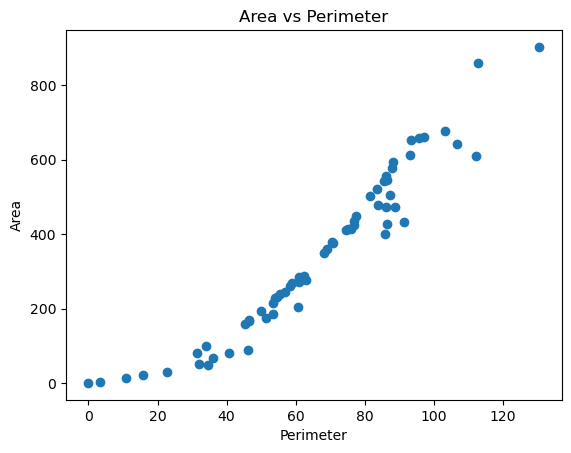

In [6]:
plt.scatter(df['Perimeter'], df['Area'])
plt.xlabel('Perimeter')
plt.ylabel('Area')
plt.title('Area vs Perimeter')
plt.show()